In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 

In [49]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

C:\Users\2024_VeronicaSibal\AppData\Local\Temp\ipykernel_16124\3936101748.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv("Fake.csv")


In [54]:
df = fake
df2 = true
relevant_columns = ['title', 'text', 'subject', 'date', 'target']
df = df[relevant_columns]

In [55]:
df.shape

(23502, 5)

In [56]:
df2.shape

(21417, 5)

In [57]:
df['target'] = 'fake'
df2['target'] = 'true'

C:\Users\2024_VeronicaSibal\AppData\Local\Temp\ipykernel_16124\1544463493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = 'fake'


In [90]:
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,fake


In [91]:
df2.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,true


In [98]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44919, 173)

In [105]:
#Shuffle Data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data1 = data[relevant_columns]

In [102]:
data1.head()

,title,text,subject,date,target
0,PERFECT! President Trump Is Laughing Hysterica...,"Last week, after President Trump retweeted a h...",politics,10-Jul-17,fake
1,LOL! Lawless HS Snowflakes Try To Bust Out Of ...,It s about time an adult steps up and takes co...,politics,18-Nov-16,fake
2,Israeli army chief says ready to share informa...,DUBAI (Reuters) - The Israeli army s chief of ...,worldnews,16-Nov-17,true
3,U.S. House Speaker Ryan: Pacific trade deal fa...,WASHINGTON (Reuters) - U.S. House Speaker Paul...,politicsNews,8-Sep-16,true
4,Trump’s Old Campaign Chair Knifed The Man Who...,"One would think Corey Lewandowski, Trump s for...",News,15-Aug-16,fake


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44919 non-null  object
 1   text     44919 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44919 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


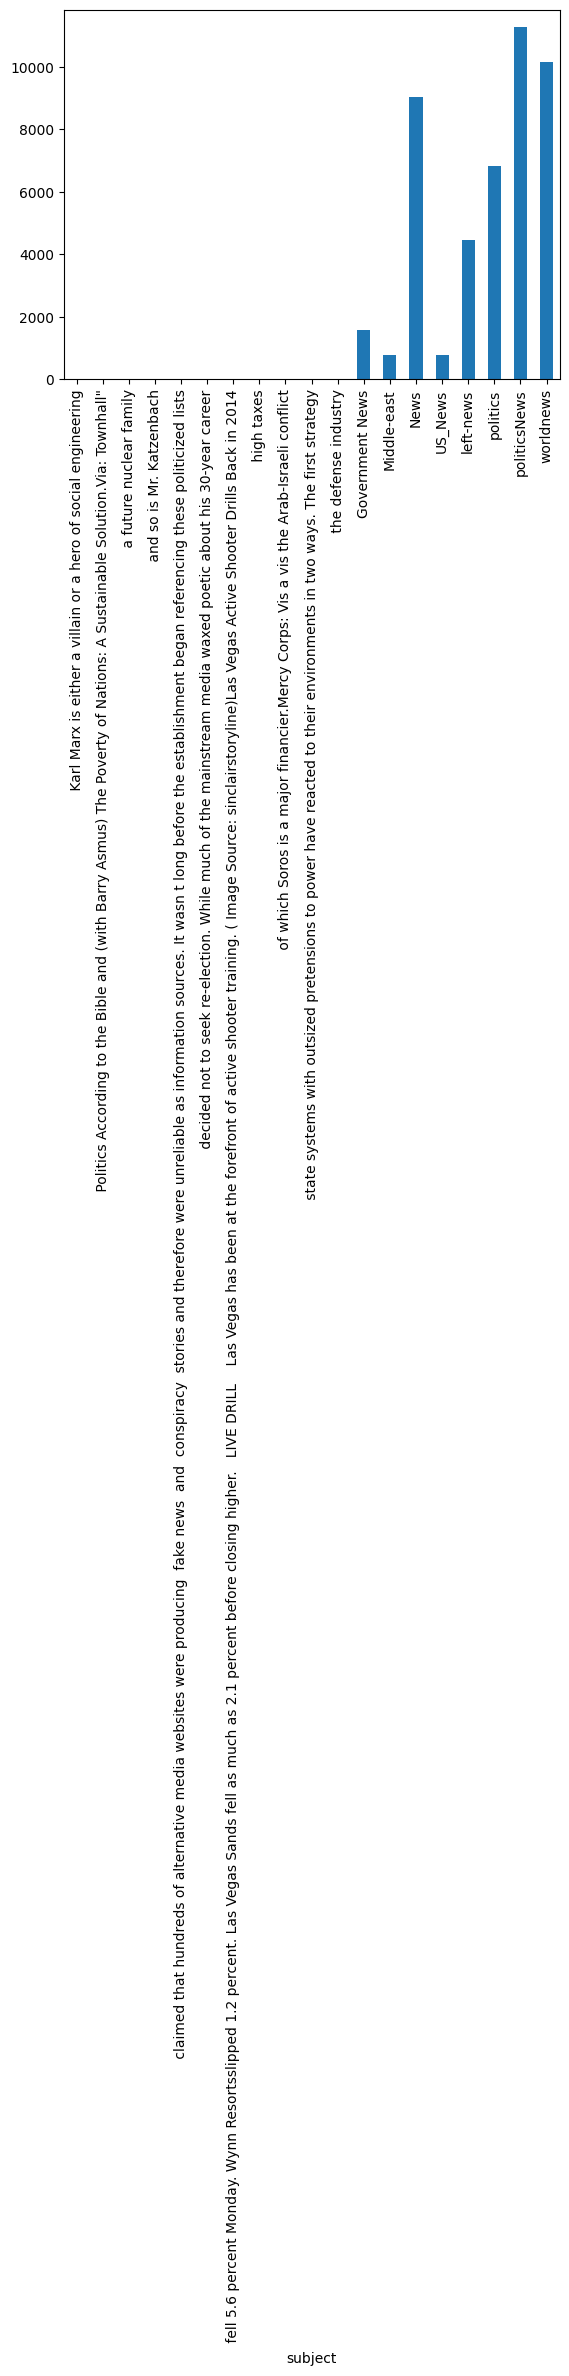

In [107]:
#Outputs Graph showing how frequency of how many articles per subject
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23502
true    21417
Name: text, dtype: int64


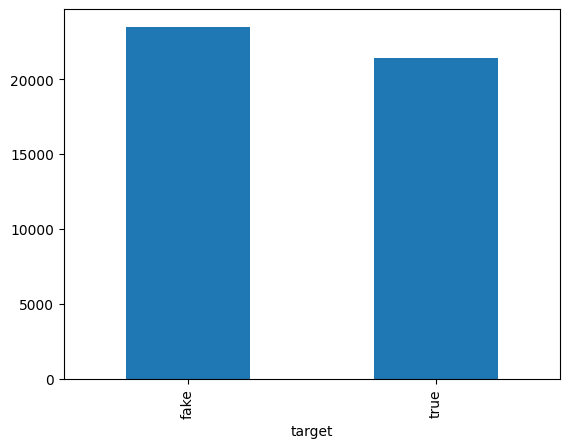

In [108]:
#Outputs graph showing distribution of how many fake and real articles there are
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

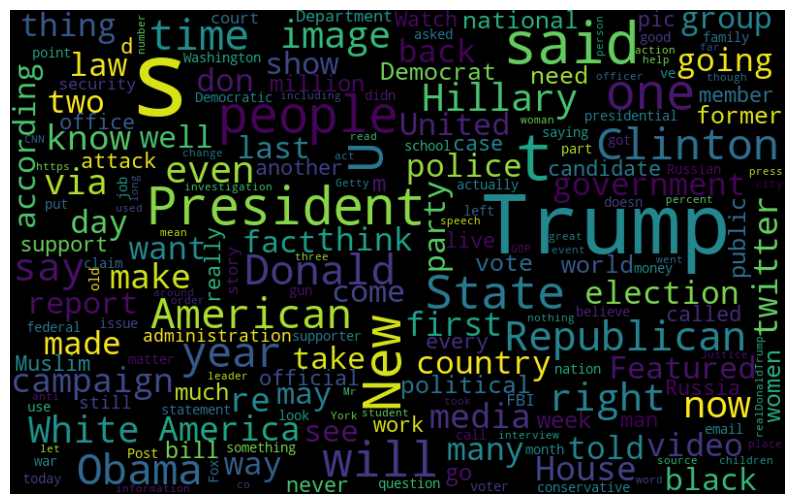

In [109]:
#Fake News Wordcloud
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

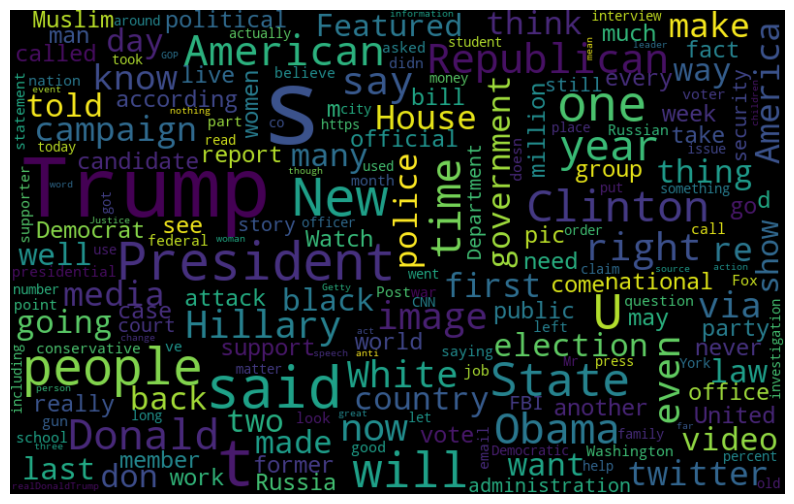

In [110]:
#Real News Wordcloud
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

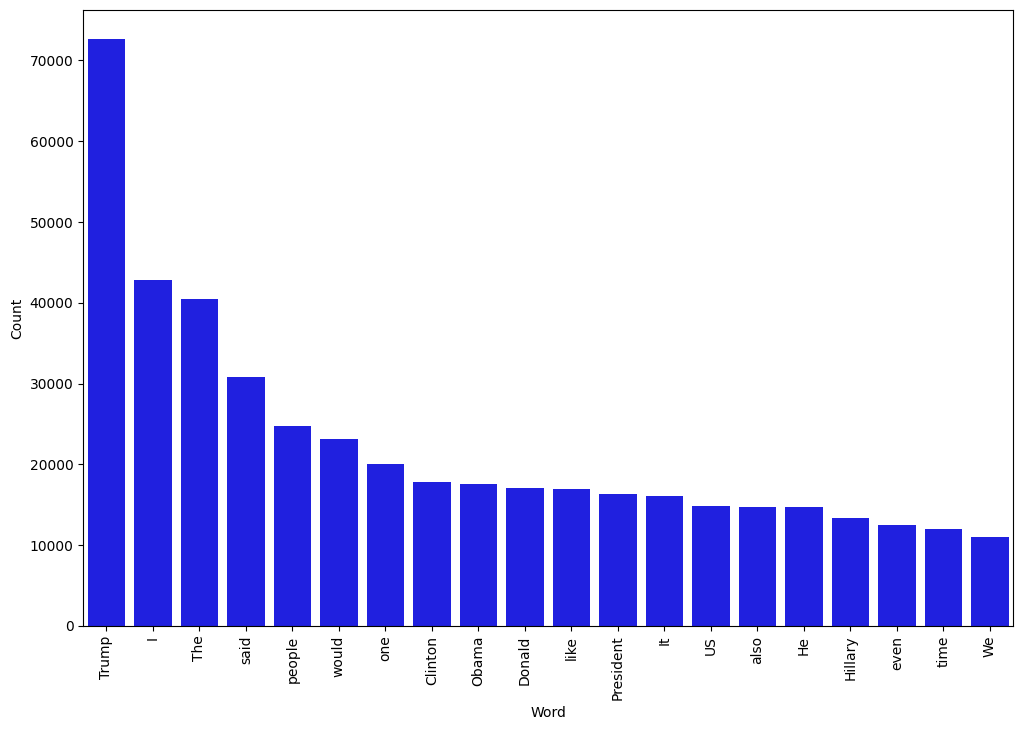

In [85]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

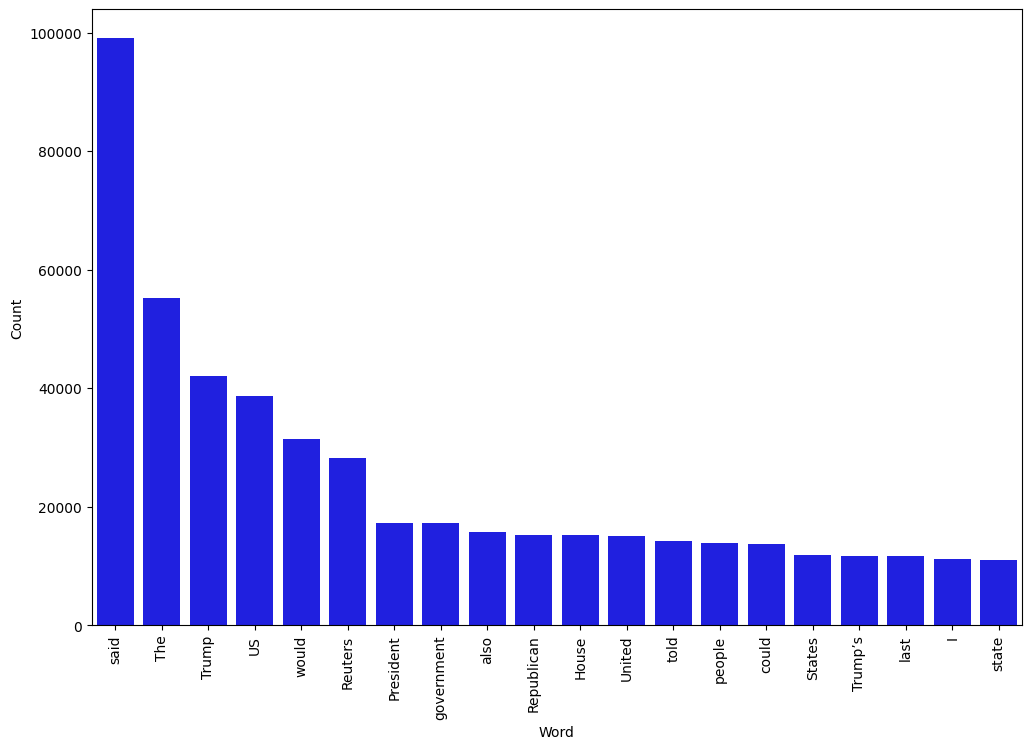

In [86]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [113]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [37]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [38]:
X_train.head()

22162    21st century wire says intense debateyesterday...
38456    manila reuters us president donald trump raise...
27530    washington reuters trump administration offici...
15650    agree liz warren know something wrongdemocrat ...
7162     republican front runner donald trump still tha...
Name: text, dtype: object

In [39]:
y_train.head()

22162    fake
38456    true
27530    true
15650    fake
7162     fake
Name: target, dtype: object

In [87]:
from sklearn.tree import DecisionTreeClassifier

#Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
#Fitting the model
model = pipe.fit(X_train, y_train)

#Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.65%


Confusion matrix, without normalization


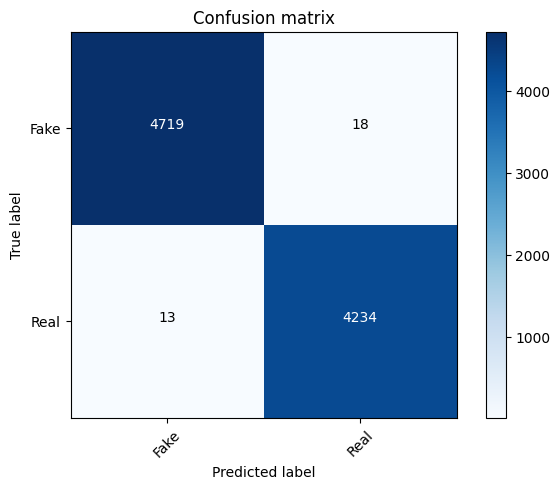

In [114]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])